# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [2]:
def gen(num=1000):
    W = [1.0, -3.0]
    b = 1.0
    
    W = np.reshape(W,(2,1))
    X = np.random.randn(num,2)
    y = b + np.dot(X,W) + np.random.randn()
    y = np.reshape(y,(num,1))
    return X,y

In [3]:
X, y = gen()

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [5]:
print(X[0], y[0])

[-0.09730272 -0.50074795] [3.12629788]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [6]:
class Model:
    def __init__(self, num_feature):
        self.num_feature = num_feature
        self.W = np.random.randn(num_feature,1)
        self.b = np.random.randn()

In [7]:
model = Model(2)
print(model.W)
print(model.b)

[[0.12882605]
 [1.09448415]]
0.06944639573618305


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [8]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [9]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [0.85141864]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [10]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [11]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat,y)

In [12]:
loss

4.580288006739365

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [13]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true),X),axis=0)
        return dW, db     

In [14]:
model = Model(2)
X, y = gen()
y_hat = model.forward_pass(X)
dW, db = model.backward_pass(X,y,y_hat)

In [15]:
print(dW, db)

[-2.00216726  3.86882648] -0.7232600879585286


# Task 7: Update Parameters

In [16]:
class Model(Model):
    def update_param(self,dW,db,lr):
        self.W = self.W - lr * np.reshape(dW,(self.num_feature,1))
        self.b = self.b - db
        

# Task 8: Training Loop

In [22]:
class Model(Model):
    def train(self,x_train,y_train,iterations,lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat,y_train)
            dW , db = self.backward_pass(x_train,y_train,y_hat)
            self.update_param(dW,db,lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter: {}, Loss:{:.4f}'.format(i,loss))
        return losses       

In [23]:
model = Model(2)

In [24]:
x_train , y_train = gen()

In [25]:
losses = model.train(x_train,y_train ,1000 , 3e-3)

Iter: 1, Loss:6.0619
Iter: 2, Loss:6.0260
Iter: 3, Loss:5.9903
Iter: 4, Loss:5.9548
Iter: 5, Loss:5.9195
Iter: 6, Loss:5.8844
Iter: 7, Loss:5.8496
Iter: 8, Loss:5.8149
Iter: 9, Loss:5.7805
Iter: 10, Loss:5.7462
Iter: 11, Loss:5.7122
Iter: 12, Loss:5.6783
Iter: 13, Loss:5.6447
Iter: 14, Loss:5.6112
Iter: 15, Loss:5.5780
Iter: 16, Loss:5.5449
Iter: 17, Loss:5.5121
Iter: 18, Loss:5.4794
Iter: 19, Loss:5.4469
Iter: 20, Loss:5.4147
Iter: 21, Loss:5.3826
Iter: 22, Loss:5.3507
Iter: 23, Loss:5.3190
Iter: 24, Loss:5.2875
Iter: 25, Loss:5.2561
Iter: 26, Loss:5.2250
Iter: 27, Loss:5.1940
Iter: 28, Loss:5.1632
Iter: 29, Loss:5.1326
Iter: 30, Loss:5.1022
Iter: 31, Loss:5.0720
Iter: 32, Loss:5.0419
Iter: 33, Loss:5.0121
Iter: 34, Loss:4.9824
Iter: 35, Loss:4.9528
Iter: 36, Loss:4.9235
Iter: 37, Loss:4.8943
Iter: 38, Loss:4.8653
Iter: 39, Loss:4.8365
Iter: 40, Loss:4.8078
Iter: 41, Loss:4.7793
Iter: 42, Loss:4.7510
Iter: 43, Loss:4.7229
Iter: 44, Loss:4.6949
Iter: 45, Loss:4.6671
Iter: 46, Loss:4.63

Iter: 630, Loss:0.1443
Iter: 631, Loss:0.1434
Iter: 632, Loss:0.1425
Iter: 633, Loss:0.1417
Iter: 634, Loss:0.1409
Iter: 635, Loss:0.1400
Iter: 636, Loss:0.1392
Iter: 637, Loss:0.1384
Iter: 638, Loss:0.1376
Iter: 639, Loss:0.1367
Iter: 640, Loss:0.1359
Iter: 641, Loss:0.1351
Iter: 642, Loss:0.1343
Iter: 643, Loss:0.1335
Iter: 644, Loss:0.1327
Iter: 645, Loss:0.1320
Iter: 646, Loss:0.1312
Iter: 647, Loss:0.1304
Iter: 648, Loss:0.1296
Iter: 649, Loss:0.1289
Iter: 650, Loss:0.1281
Iter: 651, Loss:0.1273
Iter: 652, Loss:0.1266
Iter: 653, Loss:0.1258
Iter: 654, Loss:0.1251
Iter: 655, Loss:0.1243
Iter: 656, Loss:0.1236
Iter: 657, Loss:0.1229
Iter: 658, Loss:0.1221
Iter: 659, Loss:0.1214
Iter: 660, Loss:0.1207
Iter: 661, Loss:0.1200
Iter: 662, Loss:0.1193
Iter: 663, Loss:0.1186
Iter: 664, Loss:0.1179
Iter: 665, Loss:0.1172
Iter: 666, Loss:0.1165
Iter: 667, Loss:0.1158
Iter: 668, Loss:0.1151
Iter: 669, Loss:0.1144
Iter: 670, Loss:0.1137
Iter: 671, Loss:0.1131
Iter: 672, Loss:0.1124
Iter: 673, 

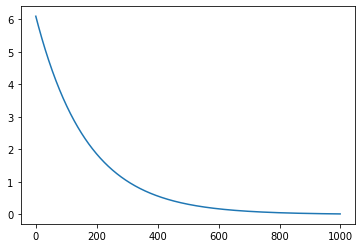

In [26]:
plt.plot(losses);

# Task 9: Predictions

In [32]:
model_untrained = Model(2)

x_test, y_test = gen(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [33]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

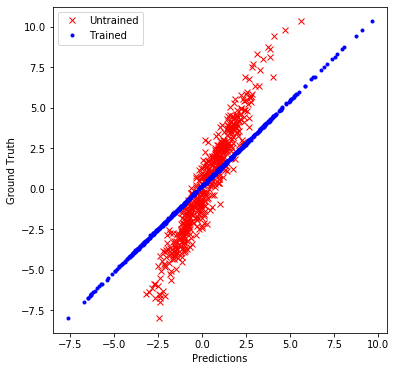

In [34]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label="Untrained")
plt.plot(preds_trained, y_test, 'b.', label="Trained")
plt.legend()
plt.xlabel("Predictions")
plt.ylabel('Ground Truth')
plt.show()